In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import STOPWORDS, WordCloud

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('df_afterEDA.csv')
df.head()

,Размер,Категория,Бренд,Материал сумок,Цвет,Длина ручки,Наличие пыльника,Состояние товара,Цена,Модель,Винтаж,Наличие коробки,Наличие сертификата
0,INT L,Сумки с короткими ручками,MARC JACOBS,Экзотическая кожа,Серебряный,Средние ручки,1,Отличное состояние,52000,Ordinary,0,0,0
1,INT S,Клатчи и вечерние сумки,VERSACE,Кожа,Черный,Короткие ручки,0,Отличное состояние,38000,Ordinary,0,0,0
2,INT M,Сумки через плечо,BALENCIAGA,Кожа,Желтый,Длинный ремень,0,Новое с биркой,345000,Crush,0,0,0
3,INT U,Сумки с короткими ручками,BURBERRY,Кожа,Коричневый,Средние ручки,0,Отличное состояние,27000,Ordinary,1,0,0
4,INT M,Сумки с короткими ручками,KARL LAGERFELD,Искусственная кожа,Мульти,Средние ручки,0,Новое с биркой,17950,Ordinary,0,0,0


---

## Ценовые категории брендов

In [3]:
df['Бренд'].unique()

array(['MARC JACOBS', 'VERSACE', 'BALENCIAGA', 'BURBERRY',
       'KARL LAGERFELD', 'BVLGARI', 'GOYARD', 'SAINT LAURENT',
       'HERMES PRE-OWNED', 'PRADA', 'LOVE MOSCHINO',
       'CHRISTIAN DIOR PRE-OWNED', 'A.P.C.', 'GUCCI', 'MICHAEL KORS',
       'LOEWE', 'BOTTEGA VENETA', 'BALMAIN', 'DIESEL', 'VALENTINO',
       'MIU MIU', 'DOLCE&GABBANA', 'LOUIS VUITTON PRE-OWNED', 'FENDI',
       'DIANE VON FURSTENBERG', 'VERSACE JEANS COUTURE',
       'CHANEL PRE-OWNED', 'PINKO', 'CELINE PRE-OWNED', 'ZIMMERMANN',
       'COACH', 'TOTEME', 'JACQUEMUS', 'STELLA MCCARTNEY', 'NINA RICCI',
       'ALAIA', 'SALVATORE FERRAGAMO', 'FURLA', 'SOPHIE HULME',
       'TOM FORD', 'CALVIN KLEIN', 'ULYANA SERGEENKO', 'KENZO',
       'OFF-WHITE', 'rodo', 'CHLOE', 'JIL SANDER', 'CHARLOTTE OLYMPIA',
       'ELISABETTA FRANCHI', 'M2MALLETIER', 'DKNY', 'JIMMY CHOO',
       'MICHAEL MICHAEL KORS', 'ETRO', 'MAX&CO', 'LOUIS FERAUD',
       'LONGCHAMP', 'AGNONA', 'EMPORIO ARMANI', 'JORDAN', 'NEOUS',
       'ALEXANDER 

На основе графика распредления цены сумок в зависимости от бренда разделим их на несколько ценовых категорий

In [4]:
unaffordably_expensive = ['BVLGARI', 'HERMES PRE-OWNED']
luxury = ['BALENCIAGA', 'BURBERRY', 'GOYARD', 'SAINT LAURENT', 'PRADA', 'CHRISTIAN DIOR PRE-OWNED', 'GUCCI', 'LOEWE', 'BOTTEGA VENETA', 'BALMAIN', 'MIU MIU', 'LOUIS VUITTON PRE-OWNED', 'FENDI', 'CHANEL PRE-OWNED', 'CELINE PRE-OWNED', 'ZIMMERMANN', 'TOTEME', 'ULYANA SERGEENKO', 'JIMMY CHOO', 'ALEXANDER MCQUEEN', 'LORO PIANA']
acessible_luxury = ['VALENTINO', 'DOLCE&GABBANA', 'JACQUEMUS', 'SALVATORE FERRAGAMO', 'TOM FORD', 'OFF-WHITE',  'MARNI', 'GIVENCHY', 'NANCY GONZALEZ']
expensive = ['MARC JACOBS', 'VERSACE', 'A.P.C.', 'DIESEL', 'COACH', 'FURLA', 'SOPHIE HULME', 'rodo', 'CHLOE', 'JIL SANDER', 'CHARLOTTE OLYMPIA', 'AGNONA', 'EMPORIO ARMANI', 'NEOUS', 'J.W.ANDERSON', 'TORY BURCH', 'COMME DES GARÇONS', 'EERA', "TOD'S", 'MARC BY MARC JACOBS', 'ZANELLATO', 'VIVIENNE WESTWOOD','NO. 21',
       'MAX MARA', 'FABIANA FILIPPI', 'LANCASTER', 'MULBERRY','MONCLER', 'THE VOLON', 'RALPH LAUREN', 'STAUD']
affordable = ['KARL LAGERFELD', 'LOVE MOSCHINO', 'MICHAEL KORS', 'DIANE VON FURSTENBERG', 'VERSACE JEANS COUTURE',  'PINKO', 'STELLA MCCARTNEY', 'NINA RICCI', 'ALAIA', 'CALVIN KLEIN', 'KENZO', 'ELISABETTA FRANCHI', 'M2MALLETIER', 'DKNY', 'MICHAEL MICHAEL KORS', 'ETRO', 'MAX&CO', 'LOUIS FERAUD', 'LONGCHAMP', 'JORDAN', 'WANDLER', 'YUZEFI', 'SPORTY AND RICH', 'VICTORIA BECKHAM',
       'TWIN-SET', 'LIU JO', 'OLYMPIA LE TAN', 'BY FAR', 'COCCINELLE', 'ADIDAS BY STELLA MCCARTNEY',
       'DOLCE & GABBANA VINTAGE', 'TRUSSARDI',
       'CEDRIC CHARLIER', 'WEEKEND MAX MARA', 'PHILIPP PLEIN', 'ZAC POSEN', 'MC2 SAINT BARTH','SEE BY CHLOE', 'RED VALENTINO', 'LANVIN']
price_dict = {}
for brand in unaffordably_expensive:
    price_dict[brand]='Экстремально люксовые'
for brand in luxury:
    price_dict[brand]='Люксовые'
for brand in acessible_luxury:
    price_dict[brand]='Доступный люкс'
for brand in expensive:
    price_dict[brand]='Дорогие'
for brand in affordable:
    price_dict[brand]='Доступные'


In [5]:
df['Ценовая категория'] = np.vectorize(lambda x: price_dict[x])(df['Бренд'])
df.head()

,Размер,Категория,Бренд,Материал сумок,Цвет,Длина ручки,Наличие пыльника,Состояние товара,Цена,Модель,Винтаж,Наличие коробки,Наличие сертификата,Ценовая категория
0,INT L,Сумки с короткими ручками,MARC JACOBS,Экзотическая кожа,Серебряный,Средние ручки,1,Отличное состояние,52000,Ordinary,0,0,0,Дорогие
1,INT S,Клатчи и вечерние сумки,VERSACE,Кожа,Черный,Короткие ручки,0,Отличное состояние,38000,Ordinary,0,0,0,Дорогие
2,INT M,Сумки через плечо,BALENCIAGA,Кожа,Желтый,Длинный ремень,0,Новое с биркой,345000,Crush,0,0,0,Люксовые
3,INT U,Сумки с короткими ручками,BURBERRY,Кожа,Коричневый,Средние ручки,0,Отличное состояние,27000,Ordinary,1,0,0,Люксовые
4,INT M,Сумки с короткими ручками,KARL LAGERFELD,Искусственная кожа,Мульти,Средние ручки,0,Новое с биркой,17950,Ordinary,0,0,0,Доступные


---

## Анализ на ручную работу

Мной было проведено дополнительное исследование, которое поможет мне разделить сумки на три категории в зависимости от бренда:*сделанные вручную*, *завершенные вручную* и *произведенные на фабрике*. Относится сумка к той или иной категории в данном случае значительно влияет на ее качество. Так например, *сделанные вручную* сумки намного качественнее *произведенных на фабрике*, но, например *завершенные вручную* зачастую производятся на одной фабрике, а не намногих, что также позволяет модному дому сделить за их качеством продукции.

In [6]:
handcrafted = ['HERMES PRE-OWNED', 'CHRISTIAN DIOR PRE-OWNED', 'BOTTEGA VENETA', 'LOEWE', 'FENDI']
handfinished = ['GUCCI','SAINT LAURENT', 'JACQUEMUS' ]
brands=set(df['Бренд'].unique())
other=brands-set(handcrafted)-set(handfinished)
produce_dict = {}
for brand in handcrafted:
    produce_dict[brand]='Сделанные вручную'
for brand in handfinished:
    produce_dict[brand]='Завершенные вручную'
for brand in other:
    produce_dict[brand]='Произведенные на фабрике'


In [7]:
df['Метод производства'] = np.vectorize(lambda x: produce_dict[x])(df['Бренд'])
df.head()

,Размер,Категория,Бренд,Материал сумок,Цвет,Длина ручки,Наличие пыльника,Состояние товара,Цена,Модель,Винтаж,Наличие коробки,Наличие сертификата,Ценовая категория,Метод производства
0,INT L,Сумки с короткими ручками,MARC JACOBS,Экзотическая кожа,Серебряный,Средние ручки,1,Отличное состояние,52000,Ordinary,0,0,0,Дорогие,Произведенные на фабрике
1,INT S,Клатчи и вечерние сумки,VERSACE,Кожа,Черный,Короткие ручки,0,Отличное состояние,38000,Ordinary,0,0,0,Дорогие,Произведенные на фабрике
2,INT M,Сумки через плечо,BALENCIAGA,Кожа,Желтый,Длинный ремень,0,Новое с биркой,345000,Crush,0,0,0,Люксовые,Произведенные на фабрике
3,INT U,Сумки с короткими ручками,BURBERRY,Кожа,Коричневый,Средние ручки,0,Отличное состояние,27000,Ordinary,1,0,0,Люксовые,Произведенные на фабрике
4,INT M,Сумки с короткими ручками,KARL LAGERFELD,Искусственная кожа,Мульти,Средние ручки,0,Новое с биркой,17950,Ordinary,0,0,0,Доступные,Произведенные на фабрике


---

## Является ли сумка легендарной моделью бренда

In [19]:
df['Легенда'] = df['Модель'].apply(lambda x: 0 if x == 'Ordinary' else 1)
df.head()

,Размер,Категория,Бренд,Материал сумок,Цвет,Длина ручки,Наличие пыльника,Состояние товара,Цена,Модель,Винтаж,Наличие коробки,Наличие сертификата,Ценовая категория,Метод производства,Легенда
0,INT L,Сумки с короткими ручками,MARC JACOBS,Экзотическая кожа,Серебряный,Средние ручки,1,Отличное состояние,52000,Ordinary,0,0,0,Дорогие,Произведенные на фабрике,0
1,INT S,Клатчи и вечерние сумки,VERSACE,Кожа,Черный,Короткие ручки,0,Отличное состояние,38000,Ordinary,0,0,0,Дорогие,Произведенные на фабрике,0
2,INT M,Сумки через плечо,BALENCIAGA,Кожа,Желтый,Длинный ремень,0,Новое с биркой,345000,Crush,0,0,0,Люксовые,Произведенные на фабрике,1
3,INT U,Сумки с короткими ручками,BURBERRY,Кожа,Коричневый,Средние ручки,0,Отличное состояние,27000,Ordinary,1,0,0,Люксовые,Произведенные на фабрике,0
4,INT M,Сумки с короткими ручками,KARL LAGERFELD,Искусственная кожа,Мульти,Средние ручки,0,Новое с биркой,17950,Ordinary,0,0,0,Доступные,Произведенные на фабрике,0


---

## Анализ информативности новых признаков

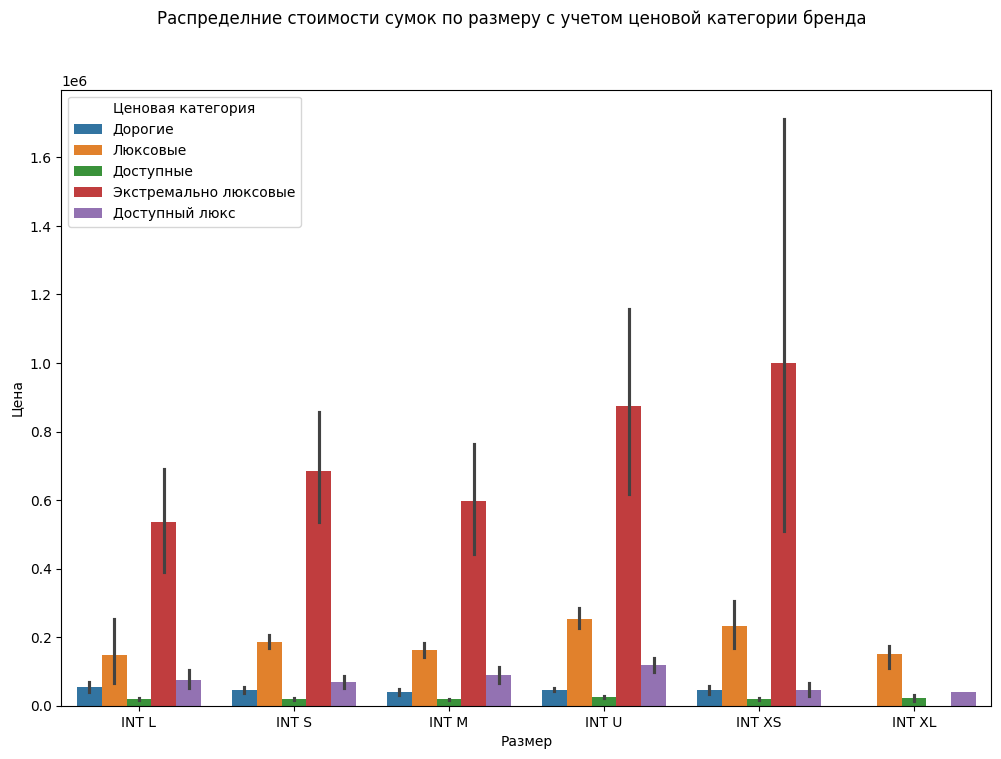

In [8]:
sns.barplot(data=df, x="Размер", y='Цена', hue="Ценовая категория")
plt.suptitle('Распределние стоимости сумок по размеру с учетом ценовой категории бренда')
fig = plt.gcf()
fig.set_size_inches(12, 8)

**Вывод:** теперь видно, что полученный при EDA результат о том, что самые дорогие сумки - размера XS связан с тем, что это справедливо для экстремально люксовых сумок, а для других категорий всреднем дороже размер ONE SIZE

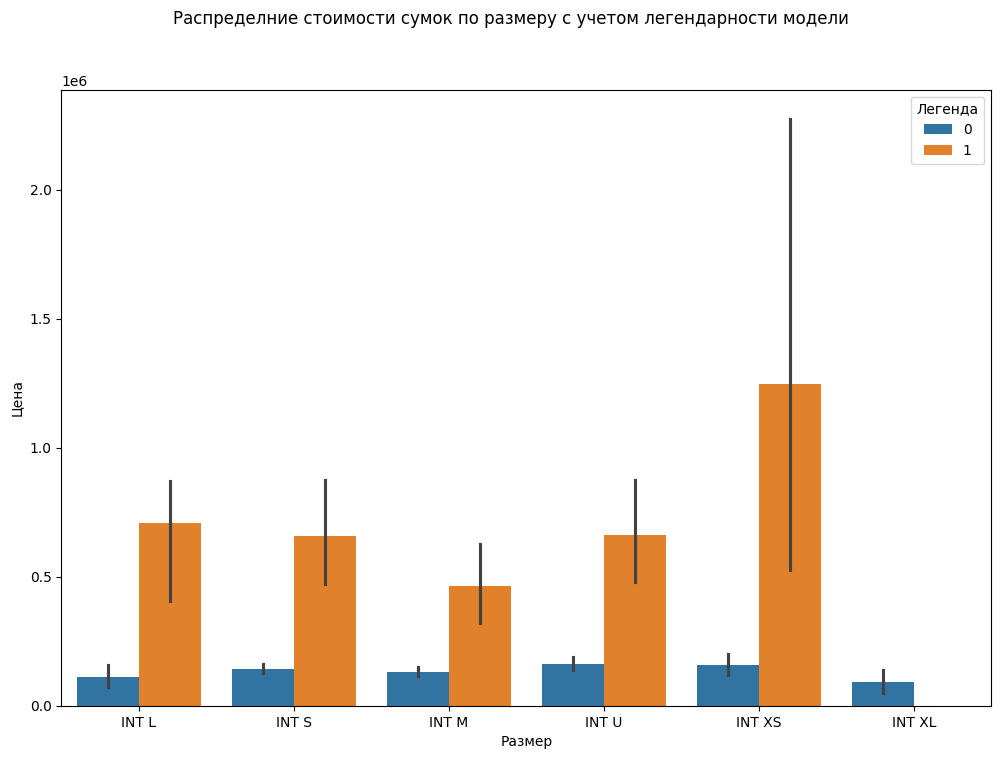

In [20]:
sns.barplot(data=df, x="Размер", y='Цена', hue="Легенда")
plt.suptitle('Распределние стоимости сумок по размеру с учетом легендарности модели')
fig = plt.gcf()
fig.set_size_inches(12, 8)

**Вывод:** Легендарные модели сумок размера XS всреднем стоят дороже, чем легендарные модели других размеров.

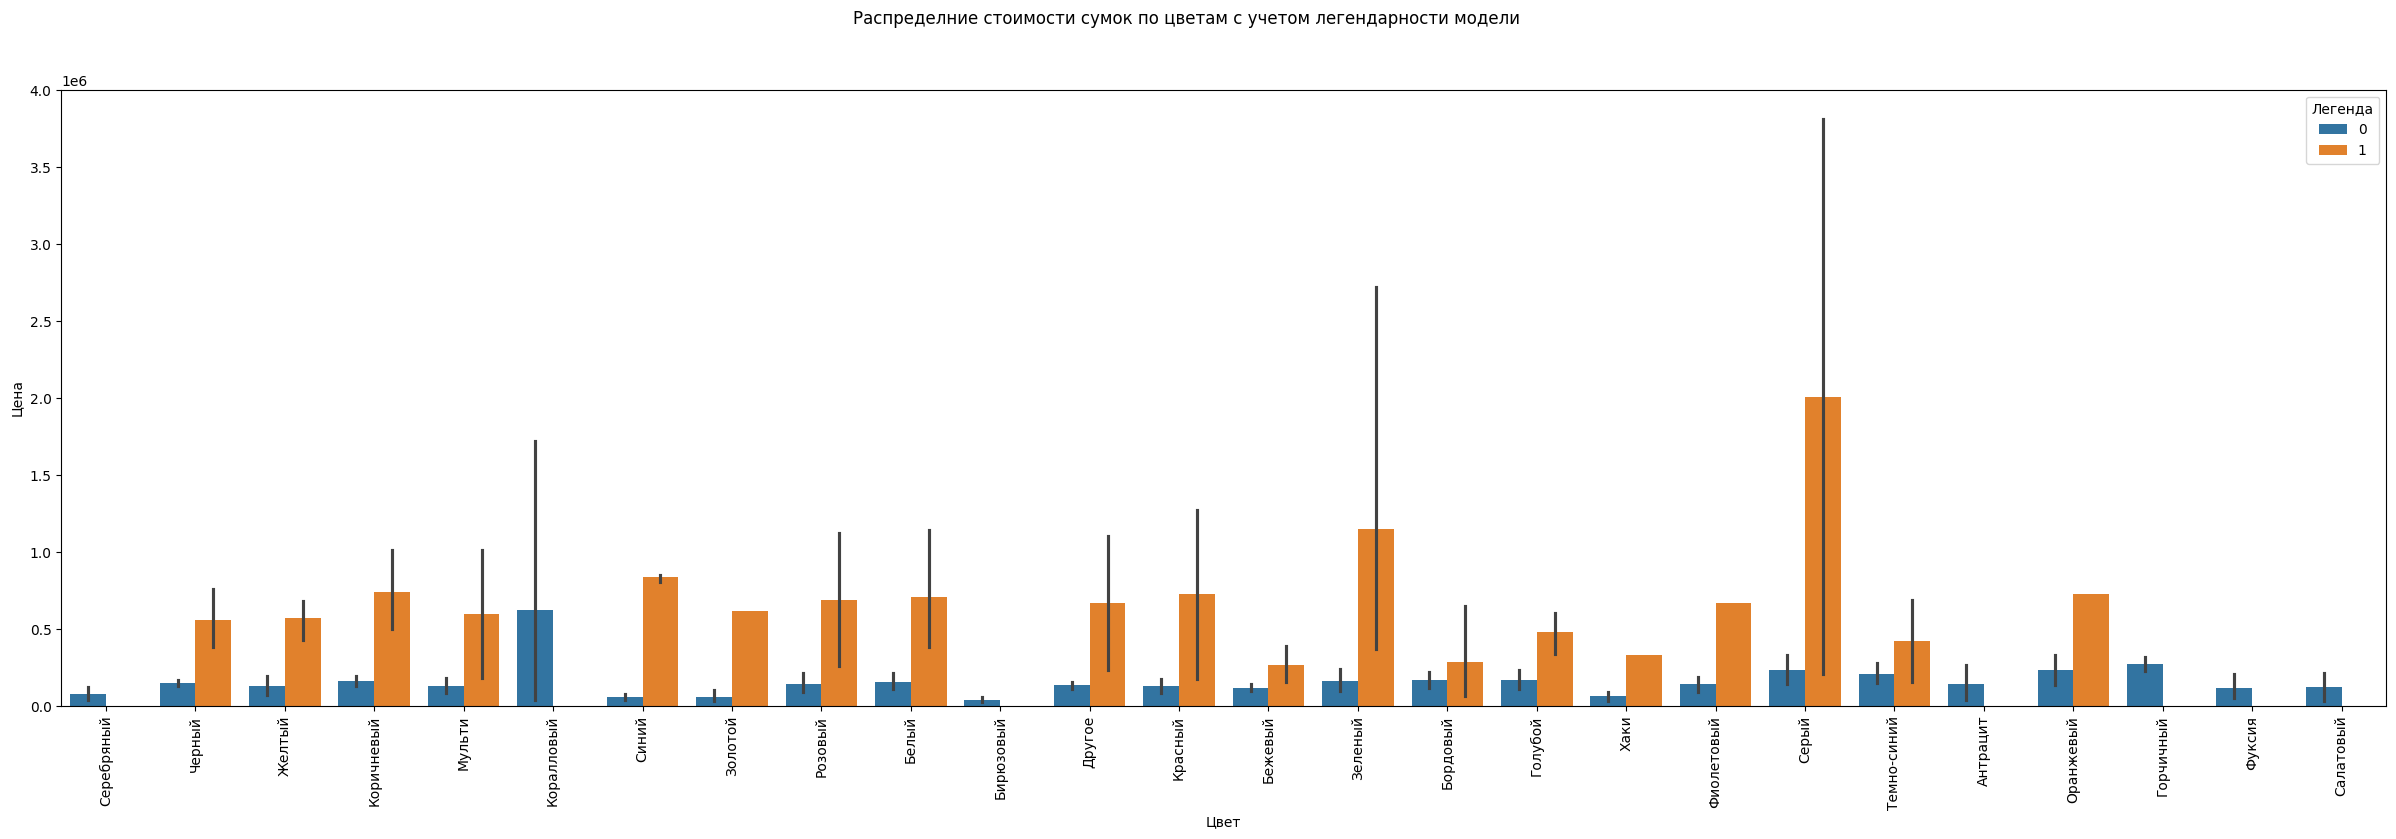

In [24]:
sns.barplot(data=df, x="Цвет", y='Цена', hue="Легенда")
plt.suptitle('Распределние стоимости сумок по цветам с учетом легендарности модели')
fig = plt.gcf()
plt.xticks(rotation=90)
fig.set_size_inches(30, 8)

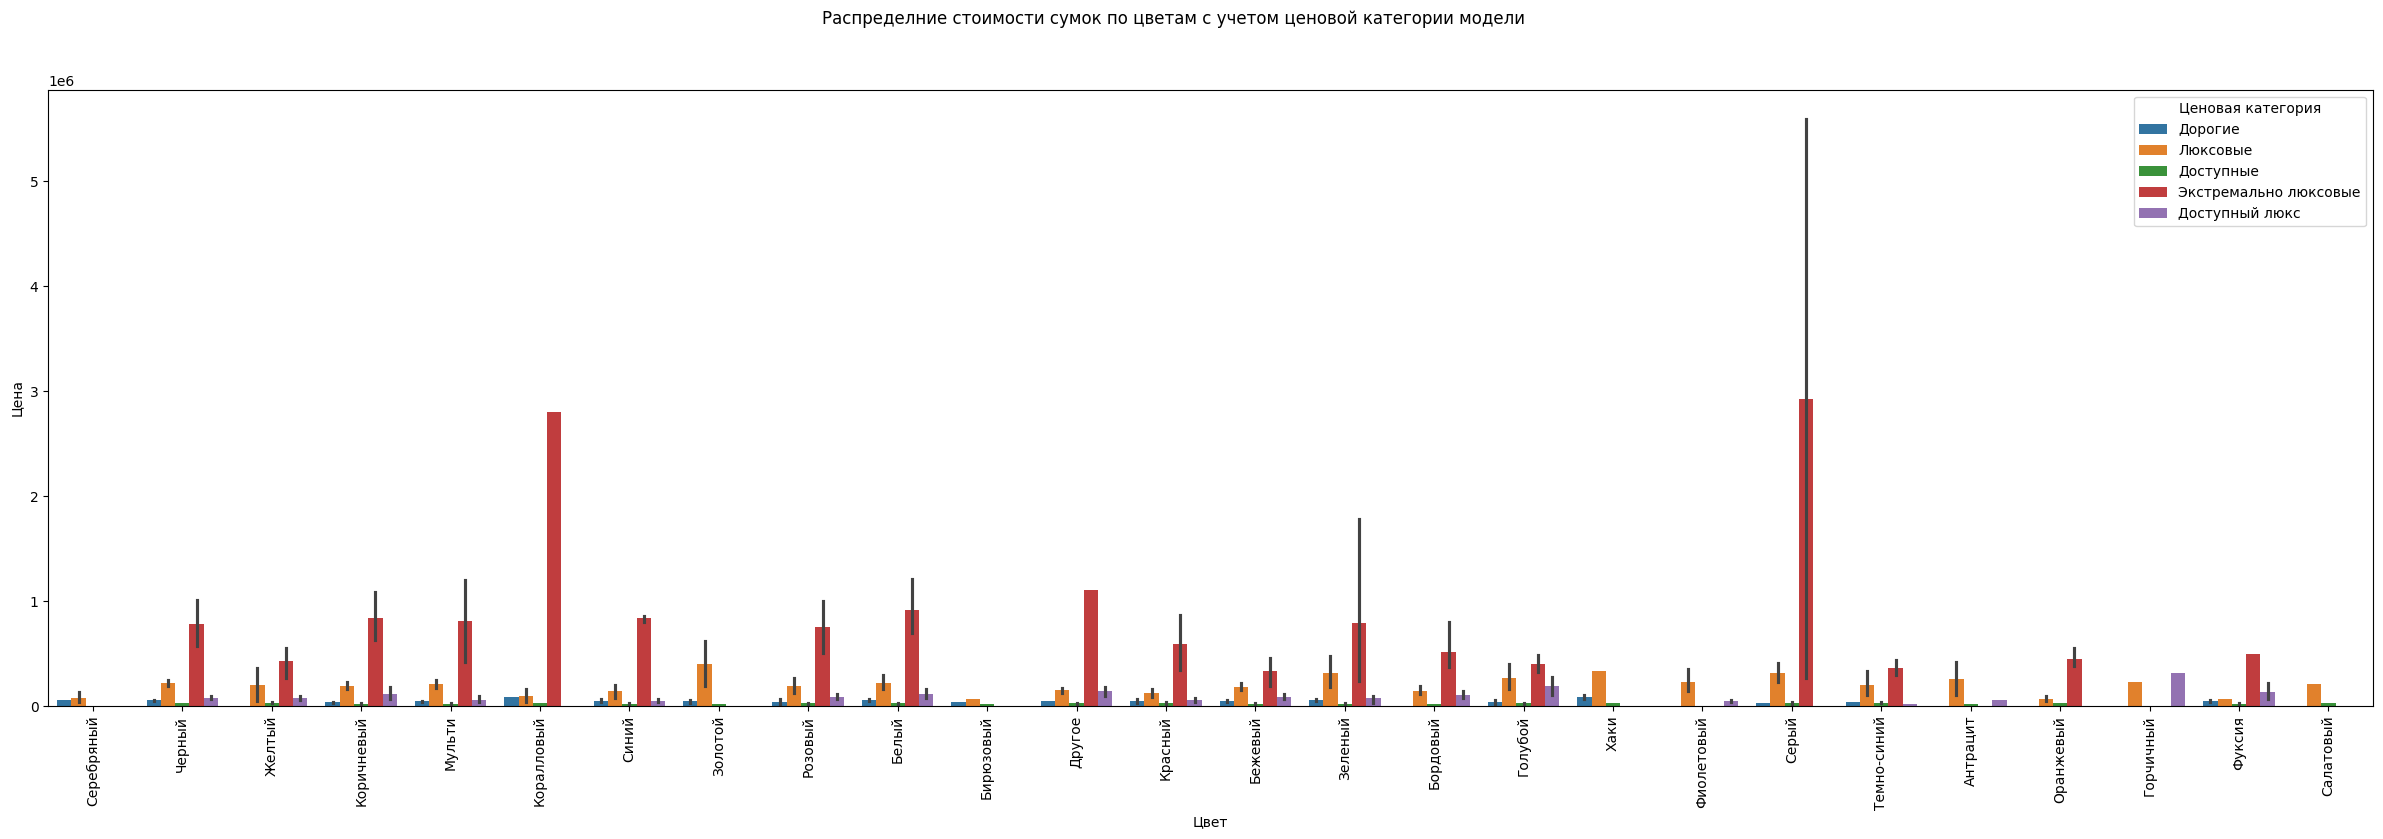

In [28]:
sns.barplot(data=df, x="Цвет", y='Цена', hue="Ценовая категория")
plt.suptitle('Распределние стоимости сумок по цветам с учетом ценовой категории модели')
fig = plt.gcf()
plt.xticks(rotation=90)
fig.set_size_inches(30, 8)

**Вывод:** моё предположение о том, что коралловые и серые сумки были сумками Hermes подтвердились. Таким образом, я убедилась в том, что распределение стоимости сумок по цветам зависит ни сколько от цвета, а сколько от того есть ли в таком цвете дорогие сумки. Однако можно увидеть, что среди экстремально люксовых сумок самые дорогие - серые и коралловые. Среди люксовых - золотые (видимо, покупатели этих брендов хотя максимально продемонстрировать как у них все "дорого-богато"). Среди доступного люкса - горчичные. Среди дорогих - коралловый.

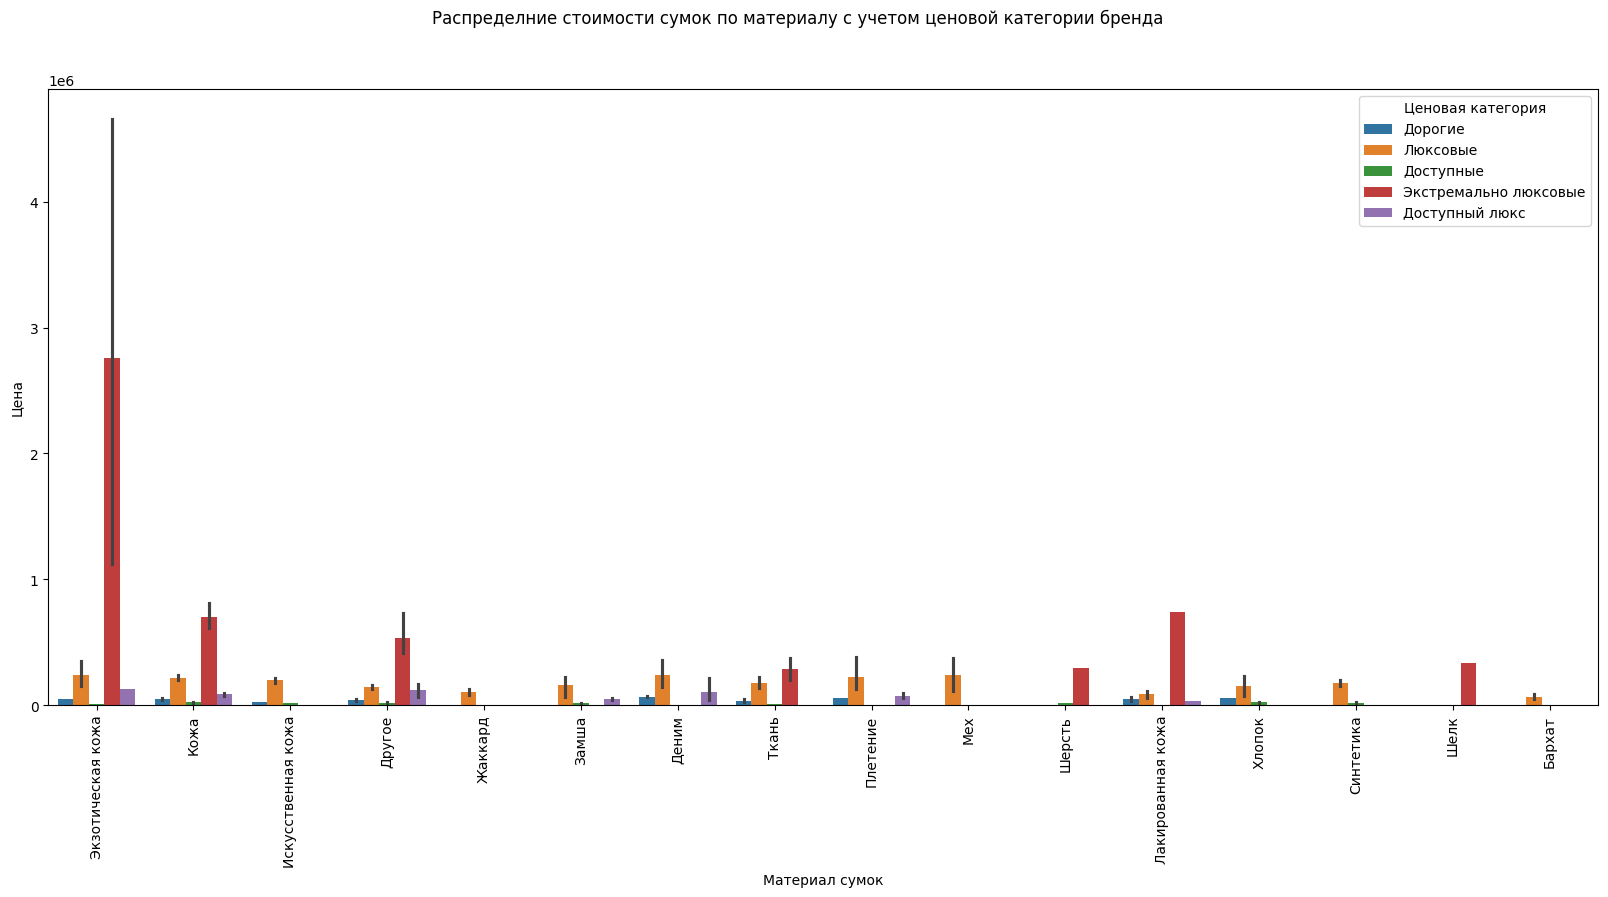

In [12]:
sns.barplot(data=df, x="Материал сумок", y='Цена', hue="Ценовая категория")
plt.suptitle('Распределние стоимости сумок по материалу с учетом ценовой категории бренда')
fig = plt.gcf()
plt.xticks(rotation=90)
fig.set_size_inches(20, 8);

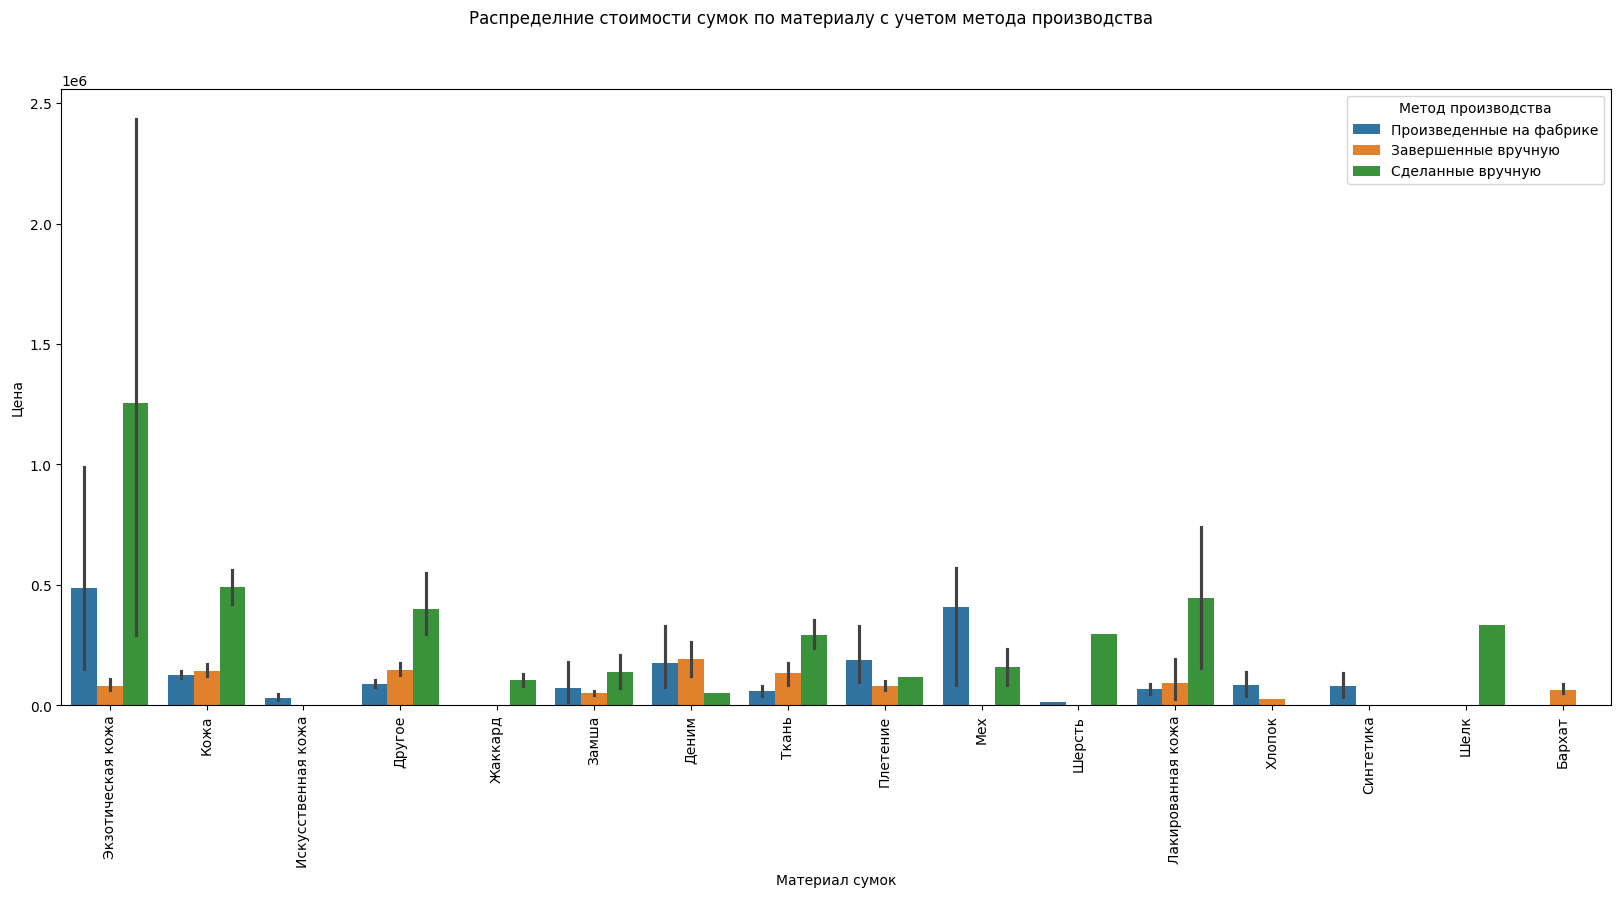

In [13]:
sns.barplot(data=df, x="Материал сумок", y='Цена', hue="Метод производства")
plt.suptitle('Распределние стоимости сумок по материалу с учетом метода производства')
fig = plt.gcf()
plt.xticks(rotation=90)
fig.set_size_inches(20, 8);

**Вывод:** Видно, что "люксовость" бренда очень сильно влияет на стоимость - вопреки материалу. Например, люксовая сумка из дешевого кожзама будет все равно стоить дороже дорогой сумки из кожи. Не говоря уже о том, что люксовые сумки из экзотической кожи, кожи, кожзама, замши, денима и синтетики стоят всреднем почти одинаково. Также видно, что средняя стоимость сумки не очень сочетается с ее качеством, то есть в некоторых материалах (включая дорогую экзотическую кожу) сумки, завершенные вручную стоят дешевле сумок, сделанных на фабрике. И честно говоря меня вообще удивляет, что есть сумки из экзотической кожи сделанные на фабрике.

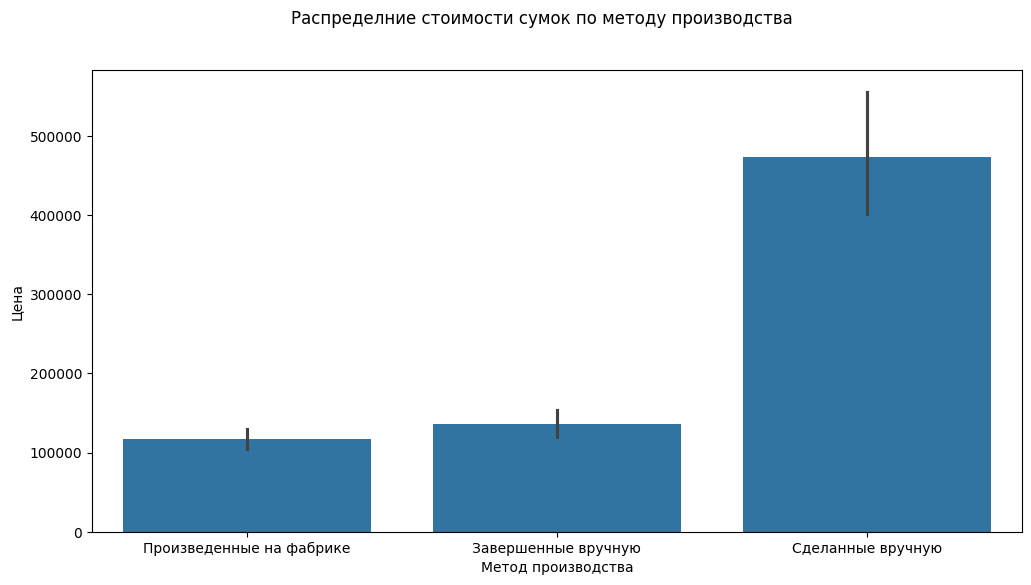

In [18]:
sns.barplot(x="Метод производства", y="Цена", data=df)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.suptitle('Распределние стоимости сумок по методу производства')
plt.show()

**Вывод:** Очевидная градация средней стоимости в зависимости от метода производства

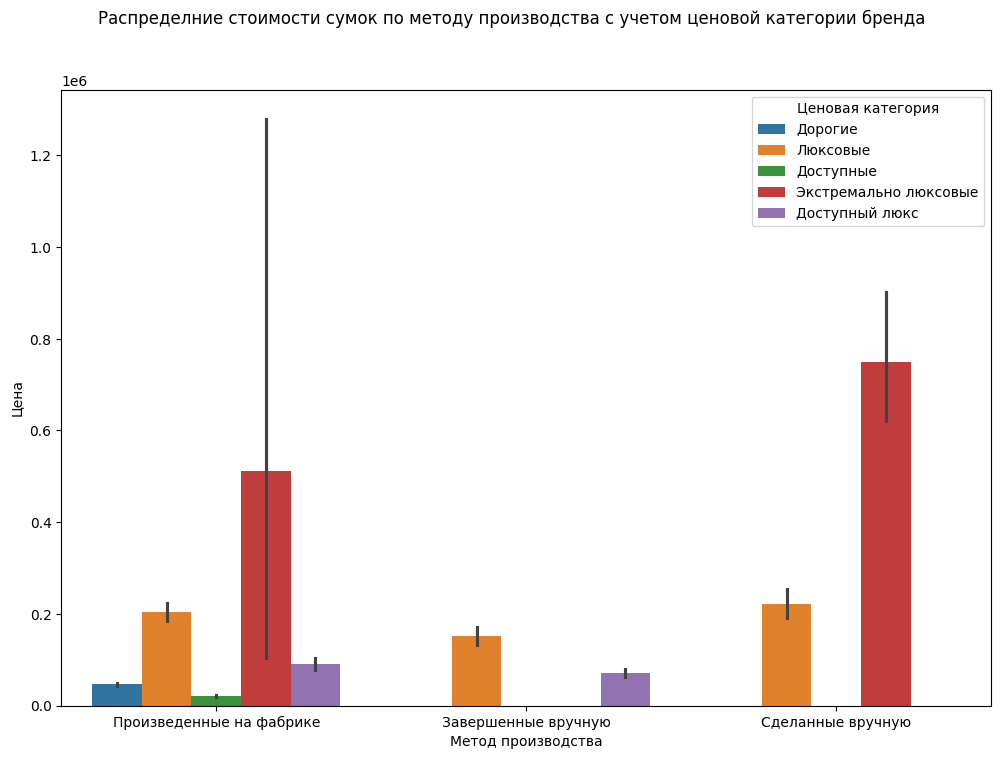

In [17]:
sns.barplot(data=df, x="Метод производства", y='Цена', hue="Ценовая категория")
plt.suptitle('Распределние стоимости сумок по методу производства с учетом ценовой категории бренда')
fig = plt.gcf()
fig.set_size_inches(12, 8)

In [25]:
#перенос цены в последний столбец
price = df.pop('Цена')
df['Цена'] = price
df.head()

,Размер,Категория,Бренд,Материал сумок,Цвет,Длина ручки,Наличие пыльника,Состояние товара,Модель,Винтаж,Наличие коробки,Наличие сертификата,Ценовая категория,Метод производства,Легенда,Цена
0,INT L,Сумки с короткими ручками,MARC JACOBS,Экзотическая кожа,Серебряный,Средние ручки,1,Отличное состояние,Ordinary,0,0,0,Дорогие,Произведенные на фабрике,0,52000
1,INT S,Клатчи и вечерние сумки,VERSACE,Кожа,Черный,Короткие ручки,0,Отличное состояние,Ordinary,0,0,0,Дорогие,Произведенные на фабрике,0,38000
2,INT M,Сумки через плечо,BALENCIAGA,Кожа,Желтый,Длинный ремень,0,Новое с биркой,Crush,0,0,0,Люксовые,Произведенные на фабрике,1,345000
3,INT U,Сумки с короткими ручками,BURBERRY,Кожа,Коричневый,Средние ручки,0,Отличное состояние,Ordinary,1,0,0,Люксовые,Произведенные на фабрике,0,27000
4,INT M,Сумки с короткими ручками,KARL LAGERFELD,Искусственная кожа,Мульти,Средние ручки,0,Новое с биркой,Ordinary,0,0,0,Доступные,Произведенные на фабрике,0,17950


In [26]:
df.to_csv('df_new_factors.csv', index=False)